# library preparation 

In [1]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.2/320.2 KB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 50.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.7/147.7 KB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 45.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 KB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━

Data source:
https://www.kaggle.com/datasets/thedevastator/predicting-credit-card-customer-attrition-with-m?select=BankChurners.csv

In [2]:
import pandas as pd

In [3]:
pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import opendatasets as od
od.download(
    "https://www.kaggle.com/datasets/thedevastator/predicting-credit-card-customer-attrition-with-m")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: donkeysally
Your Kaggle Key: ··········


100%|██████████| 379k/379k [00:00<00:00, 57.6MB/s]

In [5]:
exit()

In [6]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

#1. Exploratory data analysis

In [4]:
df = pd.read_csv('/content/predicting-credit-card-customer-attrition-with-m/BankChurners.csv')

In [5]:
df_pycaret = df.copy()

In [6]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [7]:
df = df.rename(columns={'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1': 'nb1',
                        'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2': 'nb2'})

In [8]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,nb1,nb2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

array([[<AxesSubplot:title={'center':'CLIENTNUM'}>,
        <AxesSubplot:title={'center':'Customer_Age'}>,
        <AxesSubplot:title={'center':'Dependent_count'}>,
        <AxesSubplot:title={'center':'Months_on_book'}>],
       [<AxesSubplot:title={'center':'Total_Relationship_Count'}>,
        <AxesSubplot:title={'center':'Months_Inactive_12_mon'}>,
        <AxesSubplot:title={'center':'Contacts_Count_12_mon'}>,
        <AxesSubplot:title={'center':'Credit_Limit'}>],
       [<AxesSubplot:title={'center':'Total_Revolving_Bal'}>,
        <AxesSubplot:title={'center':'Avg_Open_To_Buy'}>,
        <AxesSubplot:title={'center':'Total_Amt_Chng_Q4_Q1'}>,
        <AxesSubplot:title={'center':'Total_Trans_Amt'}>],
       [<AxesSubplot:title={'center':'Total_Trans_Ct'}>,
        <AxesSubplot:title={'center':'Total_Ct_Chng_Q4_Q1'}>,
        <AxesSubplot:title={'center':'Avg_Utilization_Ratio'}>,
        <AxesSubplot:title={'center':'nb1'}>],
       [<AxesSubplot:title={'center':'nb2'}>, <AxesSu

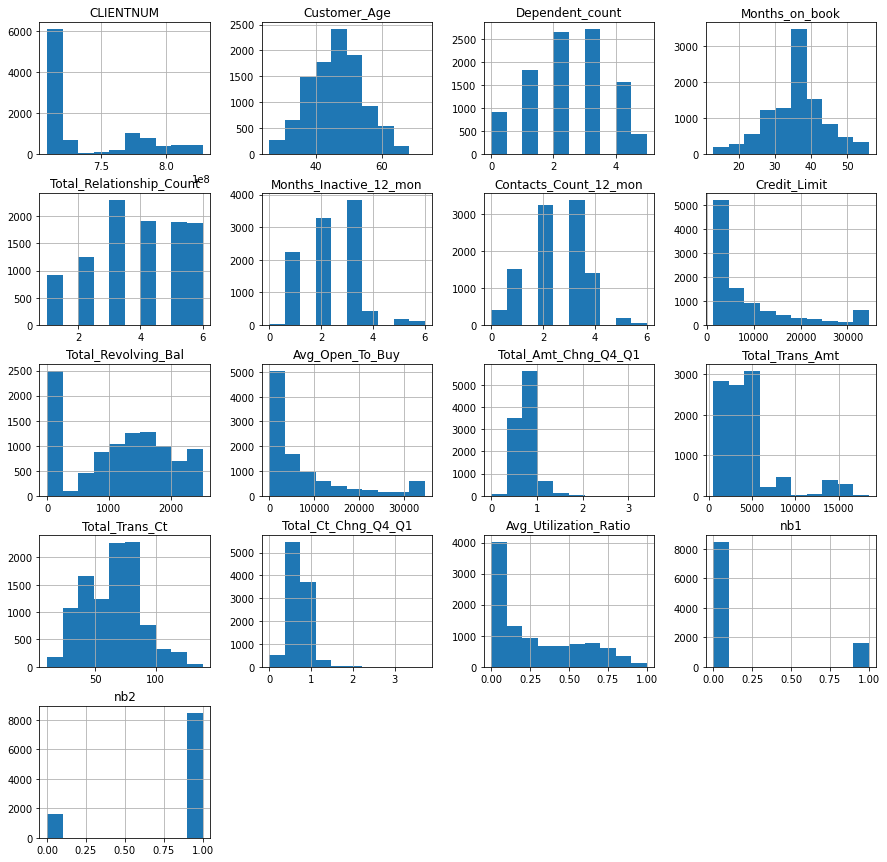

In [10]:
#plot numerical data
df.hist(figsize = (15,15))

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


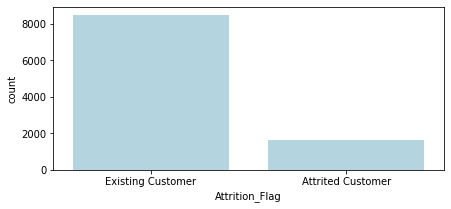

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


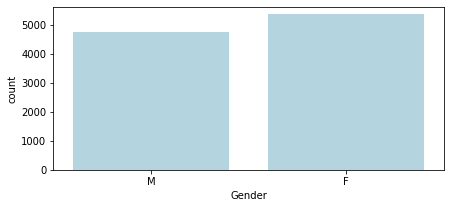

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


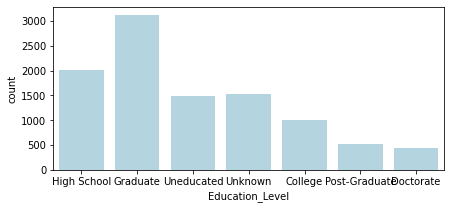

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


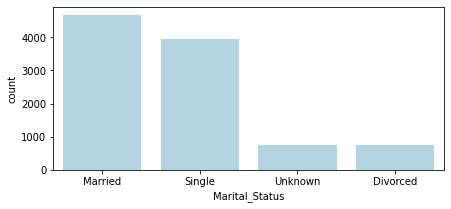

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


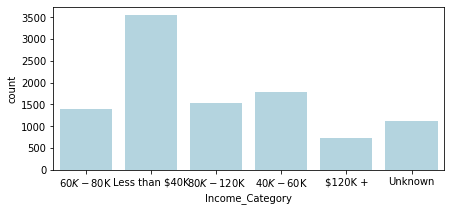

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


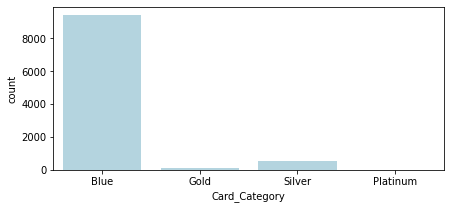

In [11]:
#plot categorical data
categorical_features = df.dtypes[df.dtypes == object].index
for col in categorical_features:
  fig, ax = plt.subplots(figsize = (7,3))
  sns.countplot(col, data = df, color = 'lightblue')
  plt.show()

In [12]:
# Seperate customer groups into Attrition and exist customers 
attrition = df.loc[df['Attrition_Flag'] == 'Attrited Customer']

In [13]:
exist = df.loc[df['Attrition_Flag'] == 'Existing Customer']

In [14]:
attrition.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,nb1,nb2
count,1.627000e+03,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000
mean,7.352614e+08,46.659496,2.402581,36.178242,3.279656,2.693301,2.972342,8136.039459,672.822987,7463.216472,0.694277,3095.025814,44.933620,0.554386,0.162475,0.994909,0.005091
std,3.557725e+07,7.665652,1.275010,7.796548,1.577782,0.899623,1.090537,9095.334105,921.385582,9109.208129,0.214924,2308.227629,14.568429,0.226854,0.264458,0.004303,0.004303
min,7.080833e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.945910,0.000420
25%,7.123713e+08,41.000000,2.000000,32.000000,2.000000,2.000000,2.000000,2114.000000,0.000000,1587.000000,0.544500,1903.500000,37.000000,0.400000,0.000000,0.994300,0.002825
50%,7.165644e+08,47.000000,2.000000,36.000000,3.000000,3.000000,3.000000,4178.000000,0.000000,3488.000000,0.701000,2329.000000,43.000000,0.531000,0.000000,0.996310,0.003688
75%,7.683737e+08,52.000000,3.000000,40.000000,5.000000,3.000000,4.000000,9933.500000,1303.500000,9257.500000,0.856000,2772.000000,51.000000,0.692000,0.231000,0.997170,0.005700
max,8.282949e+08,68.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,1.492000,10583.000000,94.000000,2.500000,0.999000,0.999580,0.054090


In [15]:
exist.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,nb1,nb2
count,8.500000e+03,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000
mean,7.399272e+08,46.262118,2.335412,35.880588,3.914588,2.273765,2.356353,8726.877518,1256.604118,7470.273400,0.772510,4654.655882,68.672588,0.742434,0.296412,0.000186,0.999814
std,3.710723e+07,8.081157,1.303229,8.021810,1.528949,1.016741,1.081436,9084.969807,757.745354,9087.671862,0.217783,3512.772635,22.919011,0.228054,0.272568,0.000140,0.000141
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,15.000000,0.256000,816.000000,11.000000,0.028000,0.000000,0.000008,0.998680
25%,7.132197e+08,41.000000,1.000000,31.000000,3.000000,1.000000,2.000000,2602.000000,800.000000,1184.500000,0.643000,2384.750000,54.000000,0.617000,0.055000,0.000090,0.999760
50%,7.181643e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4643.500000,1364.000000,3469.500000,0.743000,4100.000000,71.000000,0.721000,0.211000,0.000158,0.999840
75%,7.783415e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11252.750000,1807.000000,9978.250000,0.860000,4781.250000,82.000000,0.833000,0.529250,0.000244,0.999910
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,5.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.994000,0.001317,0.999990


array([[<AxesSubplot:title={'center':'CLIENTNUM'}>,
        <AxesSubplot:title={'center':'Customer_Age'}>,
        <AxesSubplot:title={'center':'Dependent_count'}>,
        <AxesSubplot:title={'center':'Months_on_book'}>],
       [<AxesSubplot:title={'center':'Total_Relationship_Count'}>,
        <AxesSubplot:title={'center':'Months_Inactive_12_mon'}>,
        <AxesSubplot:title={'center':'Contacts_Count_12_mon'}>,
        <AxesSubplot:title={'center':'Credit_Limit'}>],
       [<AxesSubplot:title={'center':'Total_Revolving_Bal'}>,
        <AxesSubplot:title={'center':'Avg_Open_To_Buy'}>,
        <AxesSubplot:title={'center':'Total_Amt_Chng_Q4_Q1'}>,
        <AxesSubplot:title={'center':'Total_Trans_Amt'}>],
       [<AxesSubplot:title={'center':'Total_Trans_Ct'}>,
        <AxesSubplot:title={'center':'Total_Ct_Chng_Q4_Q1'}>,
        <AxesSubplot:title={'center':'Avg_Utilization_Ratio'}>,
        <AxesSubplot:title={'center':'nb1'}>],
       [<AxesSubplot:title={'center':'nb2'}>, <AxesSu

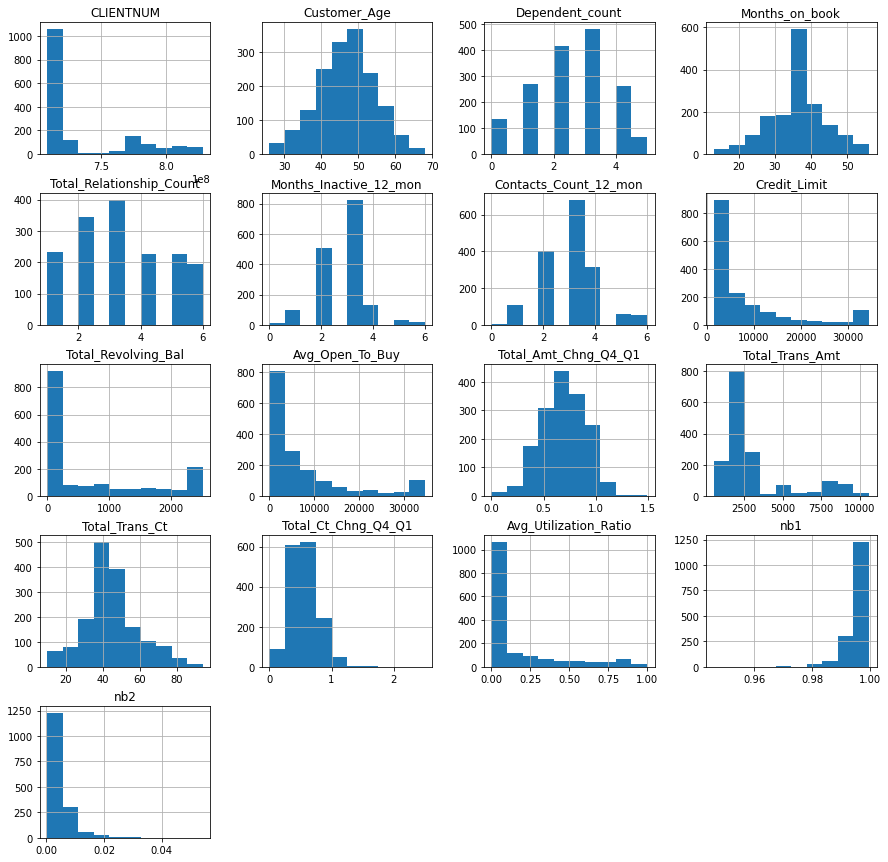

In [16]:
attrition.hist(figsize = (15,15))

array([[<AxesSubplot:title={'center':'CLIENTNUM'}>,
        <AxesSubplot:title={'center':'Customer_Age'}>,
        <AxesSubplot:title={'center':'Dependent_count'}>,
        <AxesSubplot:title={'center':'Months_on_book'}>],
       [<AxesSubplot:title={'center':'Total_Relationship_Count'}>,
        <AxesSubplot:title={'center':'Months_Inactive_12_mon'}>,
        <AxesSubplot:title={'center':'Contacts_Count_12_mon'}>,
        <AxesSubplot:title={'center':'Credit_Limit'}>],
       [<AxesSubplot:title={'center':'Total_Revolving_Bal'}>,
        <AxesSubplot:title={'center':'Avg_Open_To_Buy'}>,
        <AxesSubplot:title={'center':'Total_Amt_Chng_Q4_Q1'}>,
        <AxesSubplot:title={'center':'Total_Trans_Amt'}>],
       [<AxesSubplot:title={'center':'Total_Trans_Ct'}>,
        <AxesSubplot:title={'center':'Total_Ct_Chng_Q4_Q1'}>,
        <AxesSubplot:title={'center':'Avg_Utilization_Ratio'}>,
        <AxesSubplot:title={'center':'nb1'}>],
       [<AxesSubplot:title={'center':'nb2'}>, <AxesSu

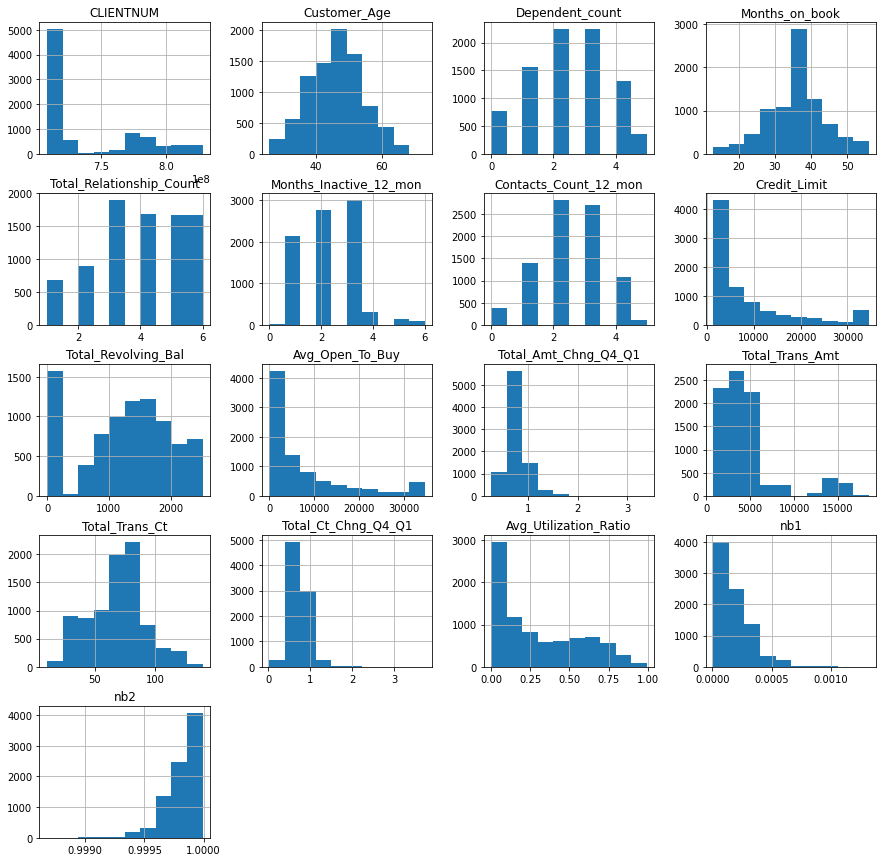

In [17]:
exist.hist(figsize = (15,15))

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


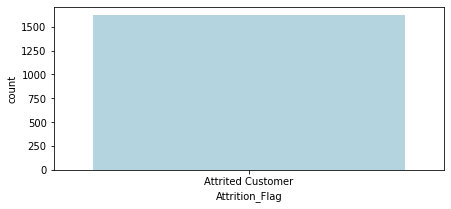

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


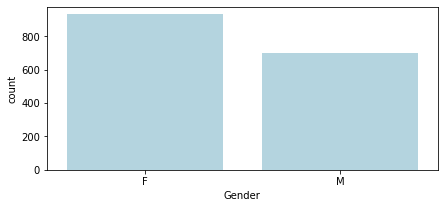

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


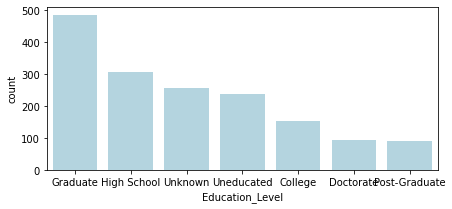

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


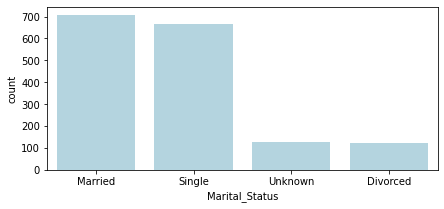

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


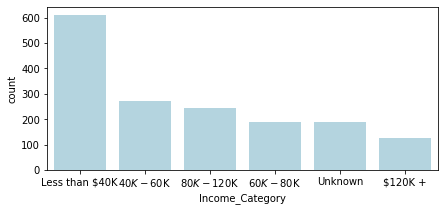

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


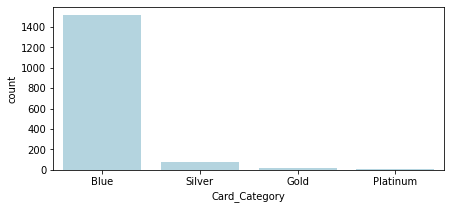

In [18]:
categorical_features = df.dtypes[df.dtypes == object].index
for col in categorical_features:
  fig, ax = plt.subplots(figsize = (7,3))
  sns.countplot(col, data = attrition, color = 'lightblue', order = attrition[col].value_counts().index)
  plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


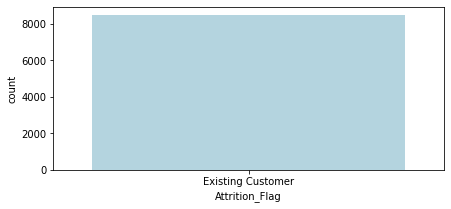

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


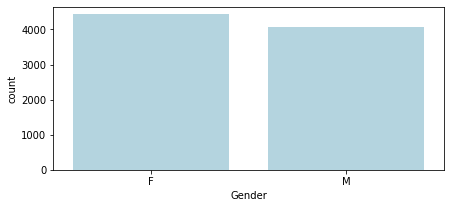

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


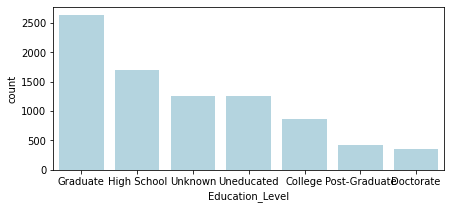

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


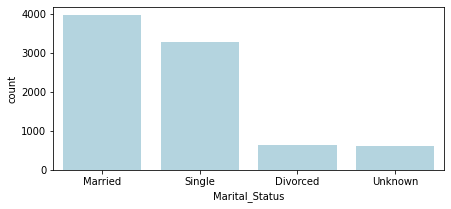

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


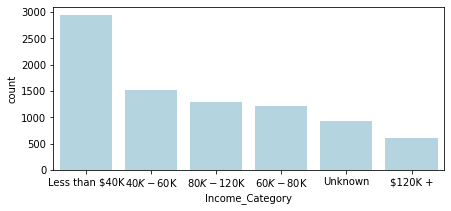

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


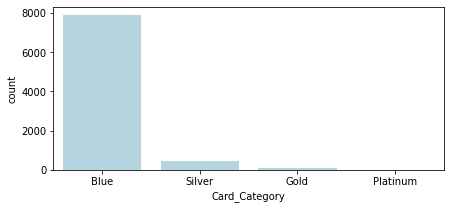

In [19]:
categorical_features = df.dtypes[df.dtypes == object].index
for col in categorical_features:
  fig, ax = plt.subplots(figsize = (7,3))
  sns.countplot(col, data = exist, color = 'lightblue', order = exist[col].value_counts().index)
  plt.show()

In [20]:
df.groupby(by = 'Education_Level')[['Income_Category']].agg(pd.Series.mode)

,Income_Category
Education_Level,
College,Less than $40K
Doctorate,Less than $40K
Graduate,Less than $40K
High School,Less than $40K
Post-Graduate,Less than $40K
Uneducated,Less than $40K
Unknown,Less than $40K


In [21]:
educationLevel = list(df['Education_Level'].unique())

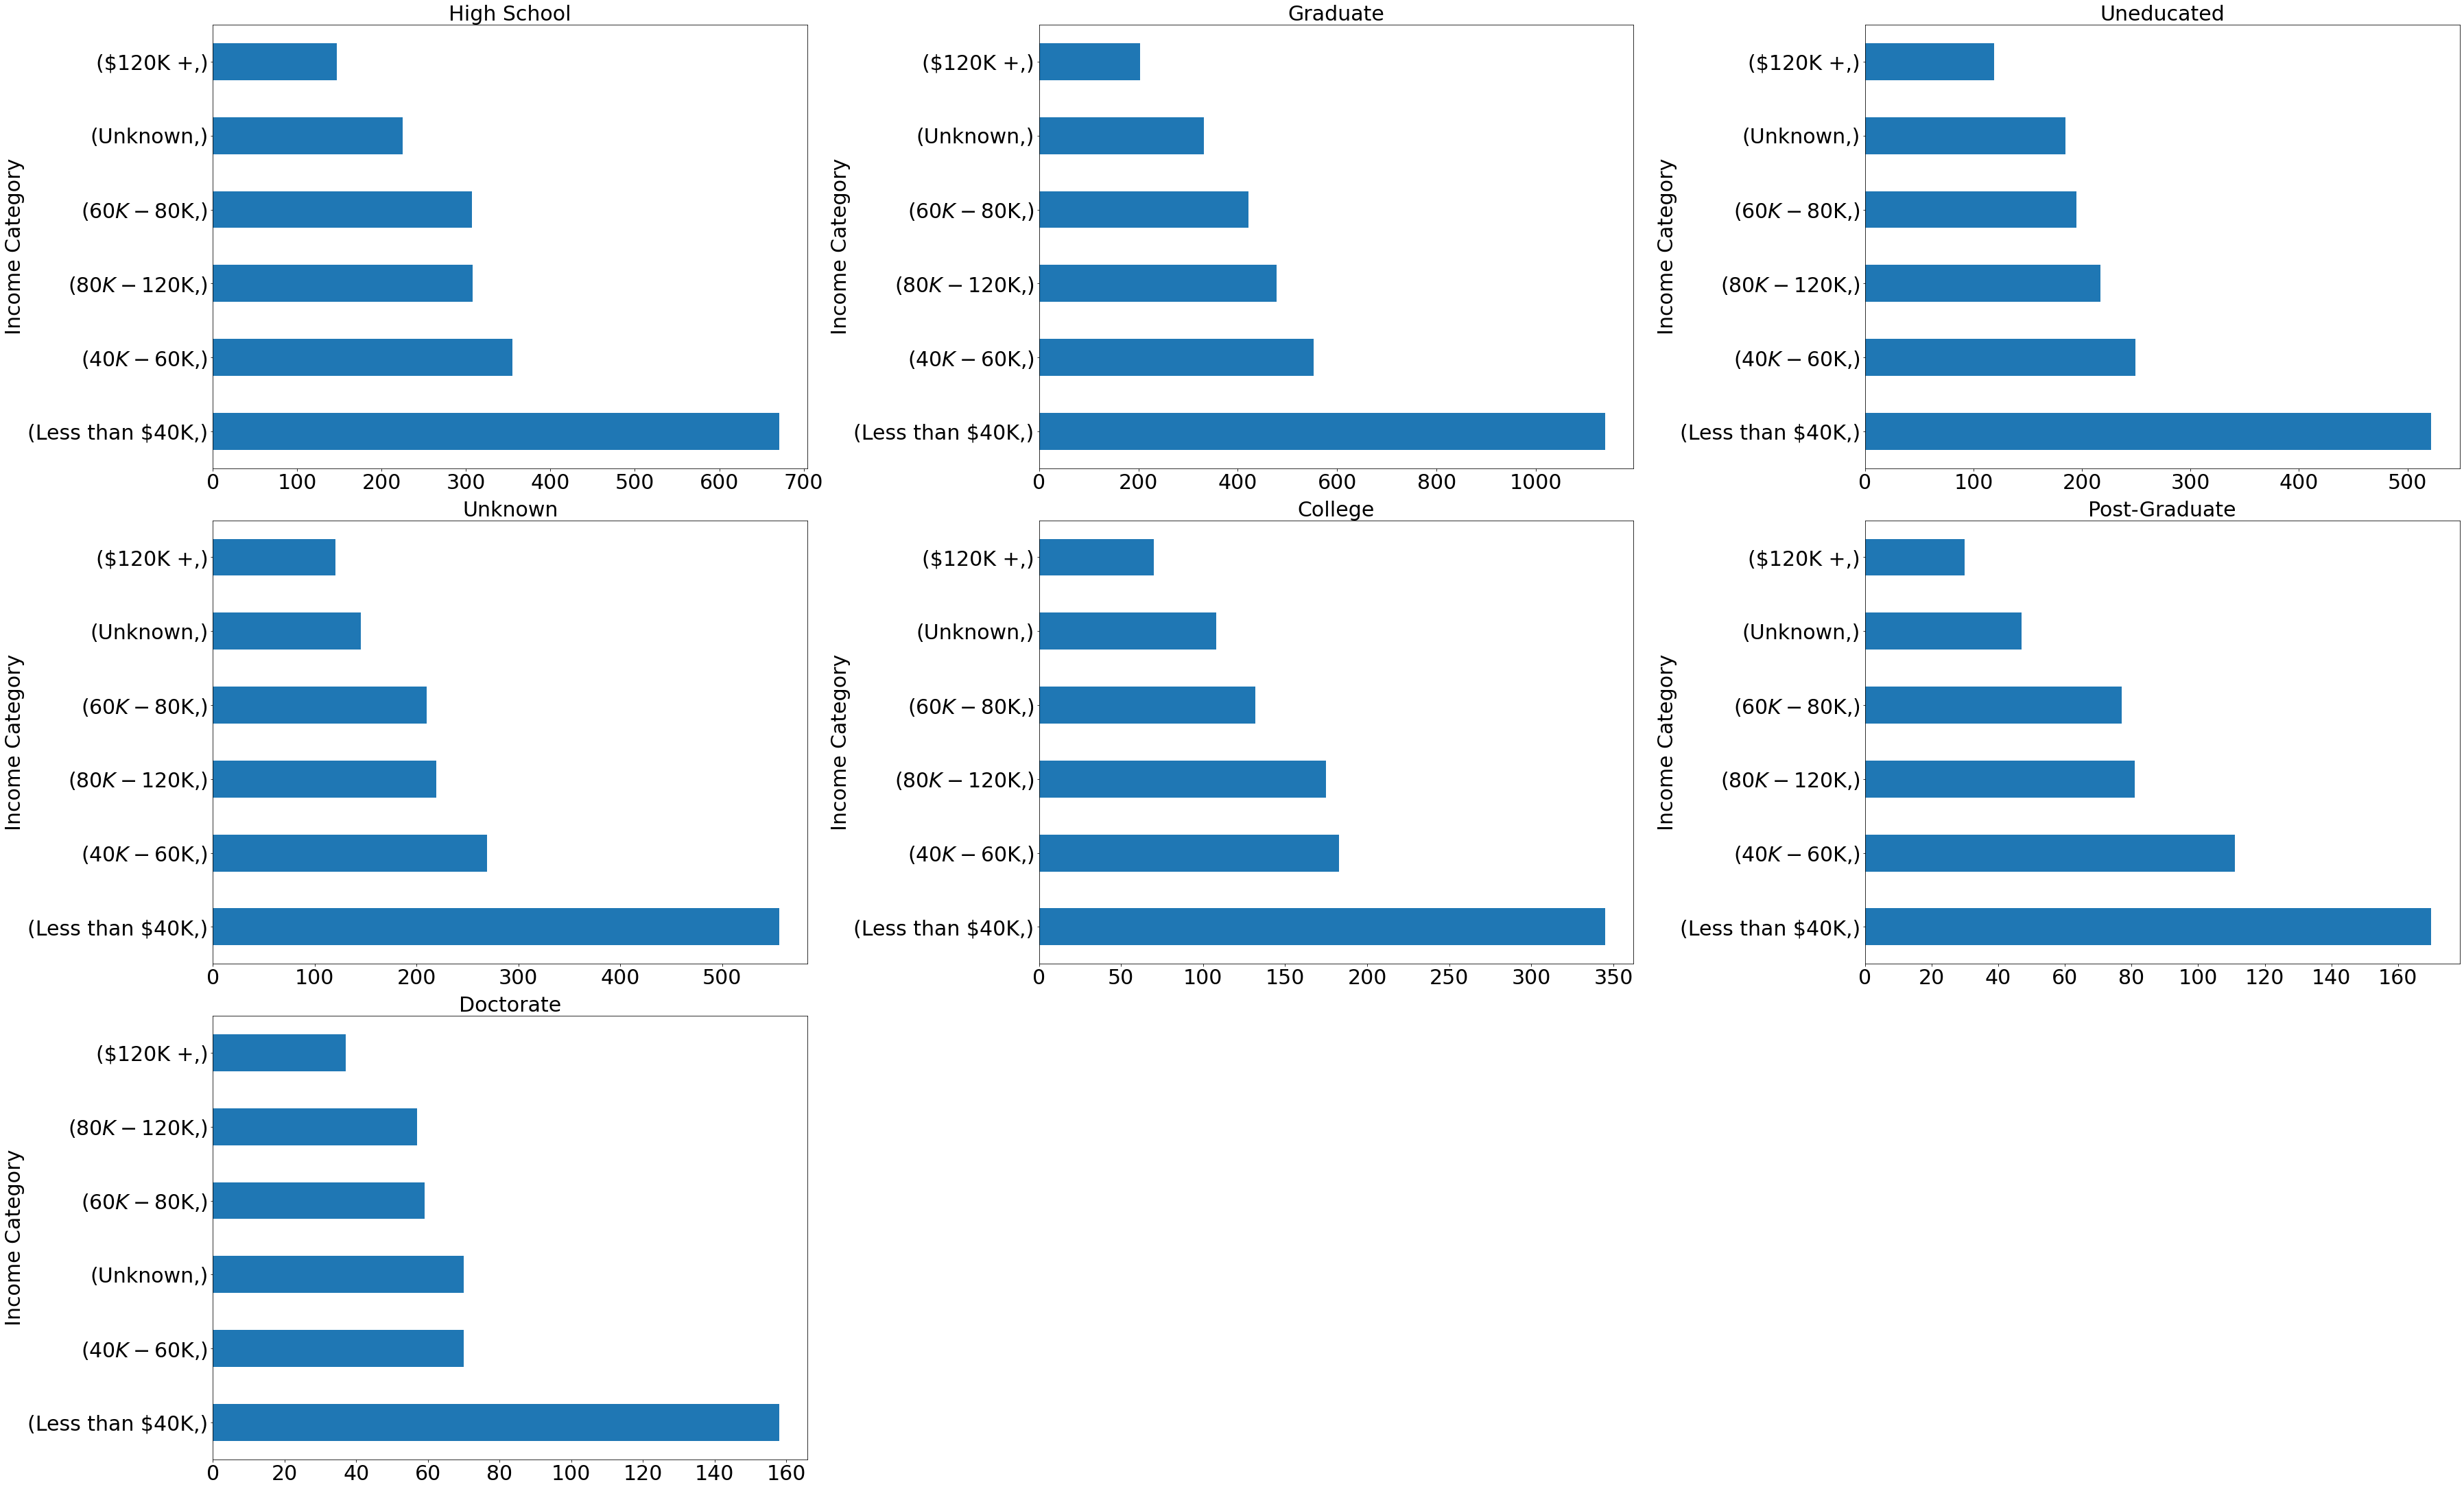

In [22]:
plt.figure(figsize = (50,100))
for i, education in enumerate(educationLevel):
  axes = plt.subplot(10, 3, i+1)
  (df.loc[df['Education_Level'] == education][['Income_Category']]
    .value_counts().plot(kind = 'barh', fontsize = 30))
  plt.title(education, fontsize = 30)
  plt.ylabel('Income Category', fontsize = 30)
plt.tight_layout()
plt.show()

In [23]:
df.groupby(by = 'Card_Category')[['Income_Category']].agg(pd.Series.mode)

,Income_Category
Card_Category,
Blue,Less than $40K
Gold,$60K - $80K
Platinum,Unknown
Silver,Less than $40K


In [24]:
CardCat = list(df['Card_Category'].unique())

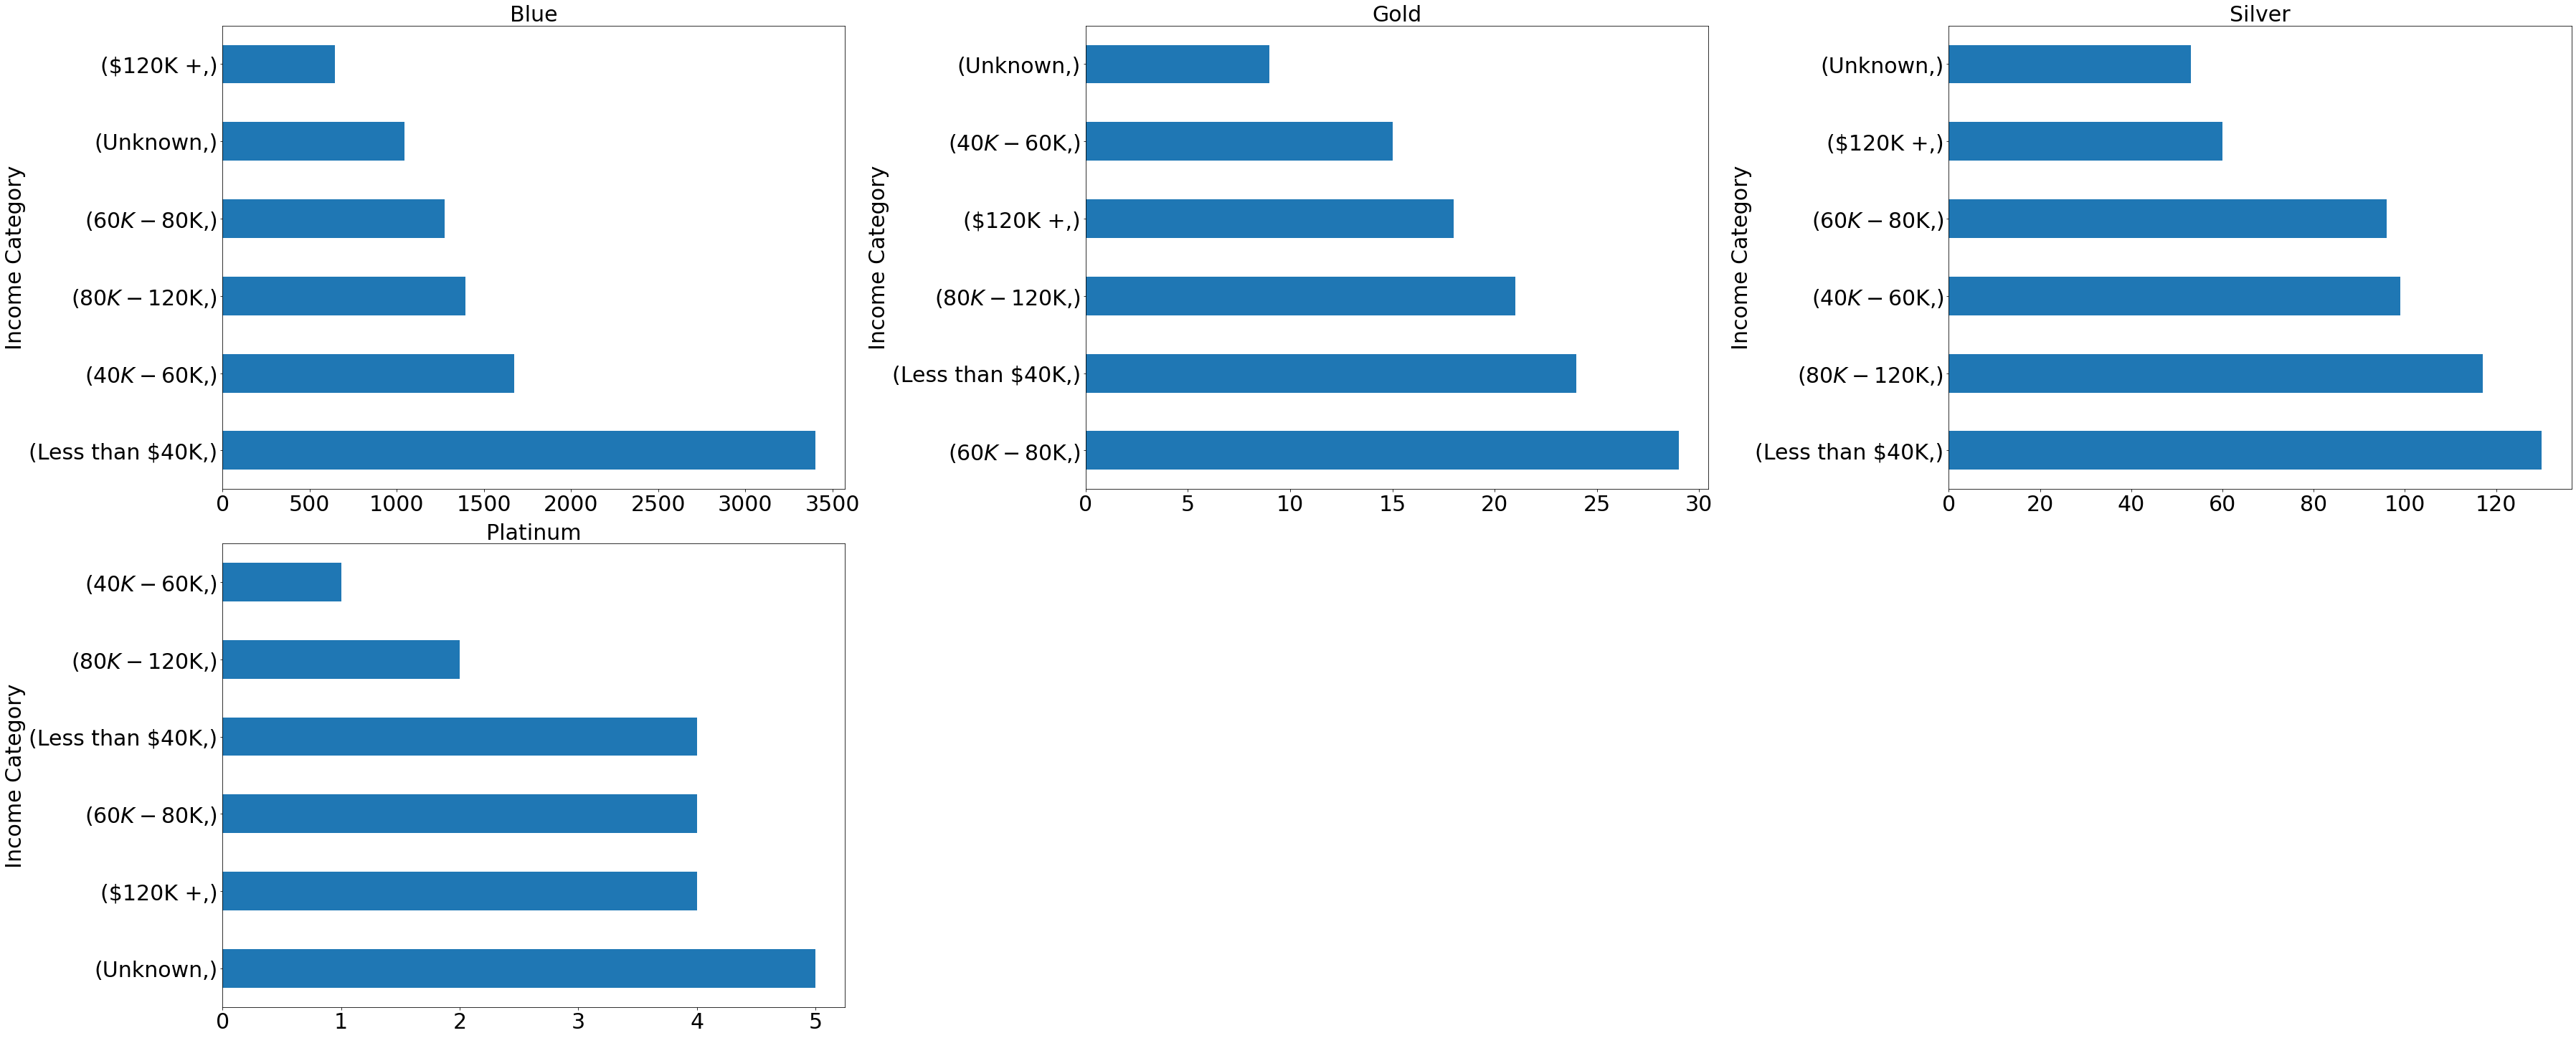

In [25]:
plt.figure(figsize = (50,100))
for i, card in enumerate(CardCat):
  axes = plt.subplot(10, 3, i+1)
  (df.loc[df['Card_Category'] == card][['Income_Category']].value_counts()
                                  .plot(kind = 'barh', fontsize = 30))
  plt.title(card, fontsize = 30)
  plt.ylabel('Income Category', fontsize = 30)
plt.tight_layout()
plt.show()

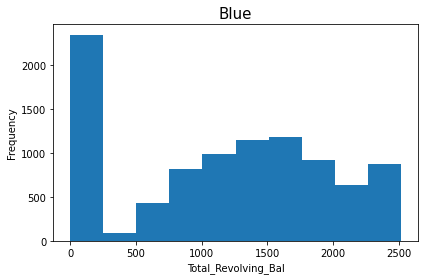

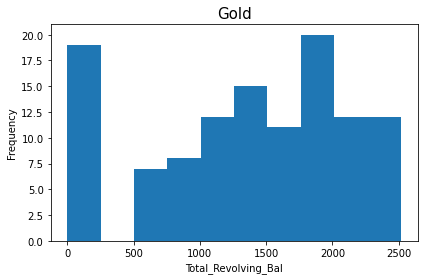

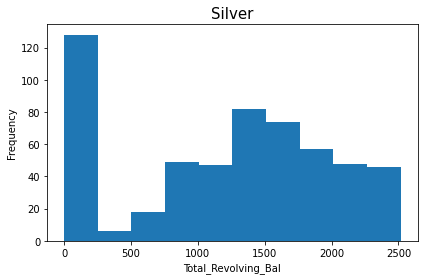

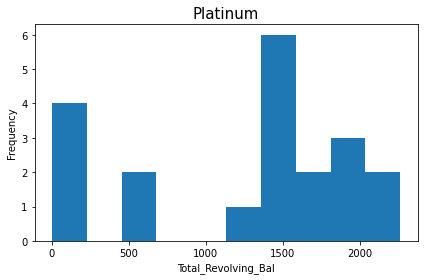

In [26]:
for card in CardCat:
  (df.loc[df['Card_Category'] == card][['Total_Revolving_Bal']]
                          .plot(kind = 'hist', legend=False))
  plt.title(card, fontsize = 15)
  plt.ylabel('Frequency', fontsize = 10)
  plt.xlabel('Total_Revolving_Bal', fontsize = 10)
  plt.tight_layout()
  plt.show()

In [27]:
df2 =  df.drop(['CLIENTNUM', 'nb1', 'nb2'], axis = 1)

In [28]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

[Text(0, 0.5, 'Customer_Age'),
 Text(0, 1.5, 'Dependent_count'),
 Text(0, 2.5, 'Months_on_book'),
 Text(0, 3.5, 'Total_Relationship_Count'),
 Text(0, 4.5, 'Months_Inactive_12_mon'),
 Text(0, 5.5, 'Contacts_Count_12_mon'),
 Text(0, 6.5, 'Credit_Limit'),
 Text(0, 7.5, 'Total_Revolving_Bal'),
 Text(0, 8.5, 'Avg_Open_To_Buy'),
 Text(0, 9.5, 'Total_Amt_Chng_Q4_Q1'),
 Text(0, 10.5, 'Total_Trans_Amt'),
 Text(0, 11.5, 'Total_Trans_Ct'),
 Text(0, 12.5, 'Total_Ct_Chng_Q4_Q1'),
 Text(0, 13.5, 'Avg_Utilization_Ratio')]

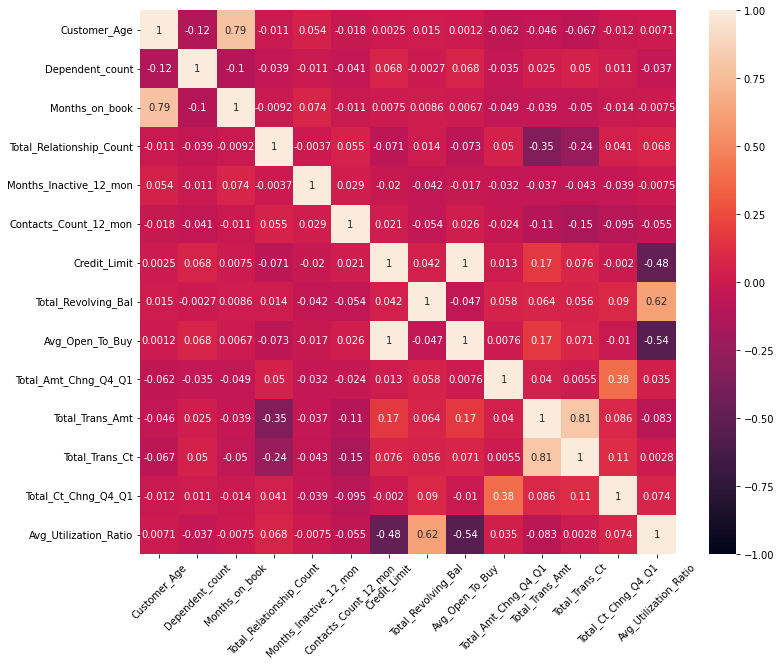

In [29]:
fig = plt.figure(figsize = (12,10))
chart = sns.heatmap(df2.corr(), vmin = -1, vmax = 1,annot=True)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
chart.set_yticklabels(chart.get_yticklabels(), rotation=0)

# 2. Preprocessing and Modeling using PyCaret 
- Clustering group of customers
- Classification for attrition prediction 

### 2.1 Clustering

In [30]:
from pycaret.clustering import *

In [31]:
df_pycaret.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [32]:
s = setup(df_pycaret, normalize = False, 
                    ignore_features = ['CLIENTNUM', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
                                       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
                    numeric_features = ['Dependent_count', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon'],
                    categorical_features = ['Gender', 'Marital_Status', 'Card_Category'],
                    ordinal_features = {'Education_Level' : ['Uneducated','High School', 'College', 'Graduate',   
                                                            'Post-Graduate', 'Doctorate', 'Unknown'],
                                        'Income_Category' : ['Less than $40K', '$40K - $60K', '$60K - $80K',  '$80K - $120K', '$120K +', 'Unknown']
                                        },
                    session_id = 123)

,Description,Value
0,session_id,123
1,Original Data,"(10127, 23)"
2,Missing Values,False
3,Numeric Features,14
4,Categorical Features,6
5,Ordinal Features,True
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(10127, 28)"
9,CPU Jobs,-1


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=['Gender',
                                                            'Marital_Status',
                                                            'Card_Category'],
                                      display_types=True,
                                      features_todrop=['CLIENTNUM',
                                                       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
                                                       'Naive_Bayes_Classifier_Attrition_Flag_Card_C...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluster_all', 'passthroug

In [33]:
kmeans = create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5292,26931.0287,0.7253,0,0,0


INFO:logs:create_model_container: 1
INFO:logs:master_model_container: 1
INFO:logs:display_container: 2
INFO:logs:KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=123, tol=0.0001, verbose=0)
INFO:logs:create_model() succesfully completed......................................


In [34]:
print(kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=123, tol=0.0001, verbose=0)


In [35]:
evaluate_model(kmeans)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=123, tol=0.0001, verbose=0), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Cluster PCA Plot (2d)', …

In [36]:
get_metrics()

,Name,Display Name,Score Function,Scorer,Target,Args,Greater is Better,Needs Ground Truth,Custom
ID,,,,,,,,,
silhouette,Silhouette,Silhouette,<function silhouette_score at 0x7f0e66529b80>,make_scorer(silhouette_score),pred,{},True,False,False
chs,Calinski-Harabasz,Calinski-Harabasz,<function calinski_harabasz_score at 0x7f0e665...,make_scorer(calinski_harabasz_score),pred,{},True,False,False
db,Davies-Bouldin,Davies-Bouldin,<function davies_bouldin_score at 0x7f0e66529e50>,make_scorer(davies_bouldin_score),pred,{},True,False,False
hs,Homogeneity Score,Homogeneity,<function homogeneity_score at 0x7f0e665331f0>,make_scorer(homogeneity_score),pred,{},True,True,False
ari,Rand Index,Rand Index,<function adjusted_rand_score at 0x7f0e66533040>,make_scorer(adjusted_rand_score),pred,{},True,True,False
cs,Completeness Score,Completeness,<function completeness_score at 0x7f0e66533280>,make_scorer(completeness_score),pred,{},True,True,False


In [37]:
kmean_results = assign_model(kmeans)
kmean_results.head()

INFO:logs:Initializing assign_model()
INFO:logs:assign_model(model=KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=123, tol=0.0001, verbose=0), transformation=False, score=True, verbose=True)
INFO:logs:Checking exceptions
INFO:logs:Determining Trained Model
INFO:logs:Trained Model : K-Means Clustering
INFO:logs:Copying data
INFO:logs:(10127, 24)
INFO:logs:assign_model() succesfully completed......................................


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2,Cluster
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991,Cluster 2
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994,Cluster 2
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998,Cluster 0
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987,Cluster 0
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998,Cluster 0


In [38]:
save_model(kmeans, 'clustering_model_k4')

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=123, tol=0.0001, verbose=0), model_name=clustering_model_k4, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=['Gender',
                                                            'Marital_Status',
                                                            'Card_Category'],
                                      display_types=True,
                                      features_todrop=['CLIENTNUM',
                                                       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
                                                       'Naive_Bayes_Classifier_Attrition_Flag_Card_C...
   

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=['Gender',
                                                             'Marital_Status',
                                                             'Card_Category'],
                                       display_types=True,
                                       features_todrop=['CLIENTNUM',
                                                        'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
                                                        'Naive_Bayes_Classifier_Attrition_Flag_Card_C...
                 ('fix_perfect', 'passthrough'),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
           

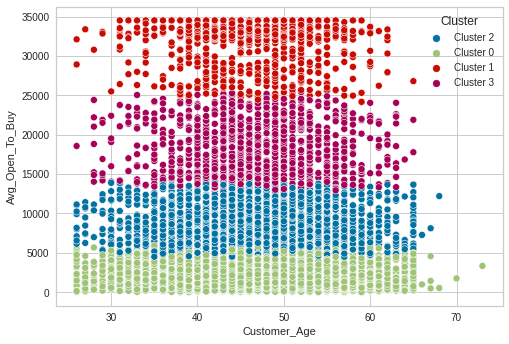

In [39]:
plot_kws = {'scatter_kws': {'s': 5}}
sns.scatterplot(data = kmean_results, x ='Customer_Age', y = 'Avg_Open_To_Buy', hue="Cluster")
plt.show()

CLIENTNUM: Unique identifier for each customer. (Integer)
Attrition_Flag: Flag indicating whether or not the customer has churned out. (Boolean)
Customer_Age: Age of customer. (Integer)
Gender: Gender of customer. (String)
Dependent_count: Number of dependents that customer has. (Integer)
Education_Level: Education level of customer. (String)
Marital_Status: Marital status of customer. (String)
Income_Category: Income category of customer. (String)
Card_Category: Type of card held by customer. (String)
Months_on_book: How long customer has been on the books. (Integer)
Total_Relationship_Count: Total number of relationships customer has with the credit card provider. (Integer)
Months_Inactive_12_mon: Number of months customer has been inactive in the last twelve months. (Integer)
Contacts_Count_12_mon: Number of contacts customer has had in the last twelve months. (Integer)
Credit_Limit: Credit limit of customer. (Integer)
Total_Revolving_Bal: Total revolving balance of customer. (Integer)
Avg_Open_To_Buy: Average open to buy ratio of customer. (Integer)
Total_Amt_Chng_Q4_Q1: Total amount changed from quarter 4 to quarter 1. (Integer)
Total_Trans_Amt: Total transaction amount. (Integer)
Total_Trans_Ct: Total transaction count. (Integer)
Total_Ct_Chng_Q4_Q1: Total count changed from quarter 4 to quarter 1. (Integer)
Avg_Utilization_Ratio: Average utilization ratio of customer. (Integer)
Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1: Naive Bayes classifier for predicting whether or not someone will churn based on characteristics such

In [40]:
#Explore characteristics of each cluster
kmean_results.groupby(['Cluster'])[['Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category'
                                 ]].agg(pd.Series.mode)

,Education_Level,Marital_Status,Income_Category,Card_Category
Cluster,,,,
Cluster 0,Graduate,Married,Less than $40K,Blue
Cluster 1,Graduate,Single,$80K - $120K,Blue
Cluster 2,Graduate,Married,Less than $40K,Blue
Cluster 3,Graduate,Married,$80K - $120K,Blue


In [41]:
kmean_results.groupby(['Cluster', 'Card_Category'])[['Education_Level', 'Marital_Status', 'Income_Category', 
                                 ]].agg(pd.Series.mode)

Education_Level  \
Cluster   Card_Category                                                      
Cluster 0 Blue                                                    Graduate   
          Gold                                      [College, High School]   
          Silver                                             Post-Graduate   
Cluster 1 Blue                                                    Graduate   
          Gold                                                    Graduate   
          Platinum                                                Graduate   
          Silver                                                  Graduate   
Cluster 2 Blue                                                    Graduate   
          Gold                                                    Graduate   
          Silver                                                  Graduate   
Cluster 3 Blue                                                    Graduate   
          Gold                                                    Graduate   
          Platinum       [Doctorate, Graduate, High School, Post-Gradua...   
          Silver                                                  Graduate   

                            Marital_Status             Income_Category  
Cluster   Card_Category                                                 
Cluster 0 Blue                     Married              Less than $40K  
          Gold                     Married  [$40K - $60K, $60K - $80K]  
          Silver                   Married                 $40K - $60K  
Cluster 1 Blue           [Married, Single]                $80K - $120K  
          Gold                      Single                 $60K - $80K  
          Platinum                  Single                     Unknown  
          Silver                    Single                $80K - $120K  
Cluster 2 Blue                     Married                 $60K - $80K  
          Gold                      Single                     Unknown  
          Silver         [Married, Single]              Less than $40K  
Cluster 3 Blue                     Married                $80K - $120K  
          Gold                      Single              Less than $40K  
          Platinum                  Single              Less than $40K  
          Silver                    Single                 $40K - $60K

In [42]:
kmean_results.groupby(['Cluster', 'Education_Level'])[[ 'Marital_Status', 'Income_Category'
                                 ]].agg(pd.Series.mode)

Marital_Status              Income_Category
Cluster   Education_Level                                                
Cluster 0 College                    Married               Less than $40K
          Doctorate                  Married               Less than $40K
          Graduate                   Married               Less than $40K
          High School                Married               Less than $40K
          Post-Graduate              Married               Less than $40K
          Uneducated                 Married               Less than $40K
          Unknown                    Married               Less than $40K
Cluster 1 College                    Married                 $80K - $120K
          Doctorate                   Single                      $120K +
          Graduate                    Single                 $80K - $120K
          High School                 Single                 $80K - $120K
          Post-Graduate               Single                 $80K - $120K
          Uneducated                  Single                 $80K - $120K
          Unknown                    Married                      $120K +
Cluster 2 College                     Single               Less than $40K
          Doctorate                  Married                      Unknown
          Graduate                   Married               Less than $40K
          High School                Married                  $60K - $80K
          Post-Graduate              Married               Less than $40K
          Uneducated                 Married               Less than $40K
          Unknown                     Single                 $80K - $120K
Cluster 3 College                    Married  [$60K - $80K, $80K - $120K]
          Doctorate                  Married                 $80K - $120K
          Graduate                   Married                 $80K - $120K
          High School                Married                 $80K - $120K
          Post-Graduate    [Married, Single]                 $80K - $120K
          Uneducated                  Single                 $80K - $120K
          Unknown                    Married                  $60K - $80K

In [43]:
kmean_results.groupby(['Cluster', 'Marital_Status'])[[ 'Customer_Age', 'Dependent_count',  'Total_Relationship_Count', 'Credit_Limit', 
       'Avg_Open_To_Buy',  'Total_Trans_Amt',
       'Total_Trans_Ct',  'Avg_Utilization_Ratio']].agg(pd.Series.mean)

Customer_Age  Dependent_count  \
Cluster   Marital_Status                                  
Cluster 0 Divorced           45.091335         2.353630   
          Married            46.894454         2.287059   
          Single             45.859436         2.232104   
          Unknown            45.932084         2.573770   
Cluster 1 Divorced           46.056338         2.577465   
          Married            46.391975         2.703704   
          Single             46.926829         2.536585   
          Unknown            43.750000         2.513158   
Cluster 2 Divorced           44.905063         2.348101   
          Married            46.588547         2.417815   
          Single             46.569591         2.259649   
          Unknown            45.291139         2.531646   
Cluster 3 Divorced           44.869565         2.380435   
          Married            46.229213         2.541573   
          Single             46.809179         2.359903   
          Unknown            45.875000         2.397727   

                          Total_Relationship_Count  Credit_Limit  \
Cluster   Marital_Status                                           
Cluster 0 Divorced                        3.896956   3141.608197   
          Married                         3.929076   3147.011529   
          Single                          3.827332   3060.383080   
          Unknown                         3.885246   3207.937002   
Cluster 1 Divorced                        3.760563  32551.535211   
          Married                         3.382716  32670.898148   
          Single                          3.487805  32860.189702   
          Unknown                         3.250000  32318.618421   
Cluster 2 Divorced                        3.816456   9746.702532   
          Married                         3.735949   9845.155885   
          Single                          3.764912   9698.602339   
          Unknown                         3.658228   9733.651899   
Cluster 3 Divorced                        3.869565  19647.847826   
          Married                         3.808989  19378.880899   
          Single                          3.797101  19357.147343   
          Unknown                         3.784091  19438.590909   

                          Avg_Open_To_Buy  Total_Trans_Amt  Total_Trans_Ct  \
Cluster   Marital_Status                                                     
Cluster 0 Divorced            1978.734660      4264.210773       67.142857   
          Married             1951.731529      3727.889412       60.342857   
          Single              1932.573970      4162.938395       66.777007   
          Unknown             2023.815222      4357.573770       67.510539   
Cluster 1 Divorced           31320.591549      4262.661972       62.915493   
          Married            31427.629630      6070.024691       70.141975   
          Single             31696.430894      5921.566396       71.869919   
          Unknown            31276.144737      6030.302632       69.789474   
Cluster 2 Divorced            8654.430380      4834.170886       66.500000   
          Married             8646.400848      4605.136797       61.816543   
          Single              8580.977778      4973.025731       68.382456   
          Unknown             8628.107595      4952.493671       66.341772   
Cluster 3 Divorced           18472.293478      5440.152174       69.739130   
          Married            18206.065169      4856.195506       64.647191   
          Single             18274.326087      5033.236715       68.251208   
          Unknown            18215.522727      4929.579545       64.545455   

                          Avg_Utilization_Ratio  
Cluster   Marital_Status                         
Cluster 0 Divorced                     0.388562  
          Married                      0.403348  
          Single                       0.392522  
          Unknown                      0.386808  
Cluster 1 Divorced               

From the data each customer cluster has characteristics as following;
- Cluster 0: Most are married with low income even they had varies educational levels. They have low purchasing power and low credit score (Utirization ratio).  

- Cluster 1: Most are single with high income. They have high purchasing power and great credit score. This group might represent upper class people or upper-middle class.

- Cluster 2: Most are married with low income. Although they didn't have much income, from average credit limit and credit score, they seem to have better money management when comparing with cluster 0 group. 

- Cluster 3: Most are married with high income. This group might be represent middle to upper-middle class who has moderate purchasing power and good credit score. 

### 2.2 Classification 

In [44]:
from sklearn.model_selection import train_test_split
df_pycaret_train, df_pycaret_test = train_test_split(df_pycaret, test_size=0.2, random_state=42)

In [45]:
#Clsssification for attrition prediction
from pycaret.classification import *
s2 = setup(data = df_pycaret_train, target = 'Attrition_Flag',
           ignore_features = ['CLIENTNUM', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
                                       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
           numeric_features = ['Dependent_count', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon'],
           categorical_features = ['Gender', 'Marital_Status', 'Card_Category'],
           ordinal_features = {'Education_Level' : ['Uneducated','High School', 'College', 'Graduate',   
                                                            'Post-Graduate', 'Doctorate', 'Unknown'],
                                        'Income_Category' : ['Less than $40K', '$40K - $60K', '$60K - $80K',  '$80K - $120K', '$120K +', 'Unknown']
                                        },
           session_id = 123)

,Description,Value
0,session_id,123
1,Target,Attrition_Flag
2,Target Type,Binary
3,Label Encoded,"Attrited Customer: 0, Existing Customer: 1"
4,Original Data,"(8101, 23)"
5,Missing Values,False
6,Numeric Features,14
7,Categorical Features,5
8,Ordinal Features,True
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=['Gender',
                                                            'Marital_Status',
                                                            'Card_Category'],
                                      display_types=True,
                                      features_todrop=['CLIENTNUM',
                                                       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
                                                       'Naive_Bayes_Classifier_Attrition_Flag_Card_C...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluster_all', 'passthroug

In [46]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9735,0.9937,0.9894,0.9791,0.9843,0.9016,0.9024,0.326
gbc,Gradient Boosting Classifier,0.9677,0.9898,0.9903,0.9717,0.9809,0.8776,0.8798,1.636
ada,Ada Boost Classifier,0.9621,0.9859,0.9816,0.9732,0.9774,0.8598,0.8604,0.333
rf,Random Forest Classifier,0.9557,0.9868,0.9875,0.9606,0.9739,0.8289,0.8330,1.118
dt,Decision Tree Classifier,0.9376,0.8832,0.9643,0.9611,0.9627,0.7717,0.7723,0.046
et,Extra Trees Classifier,0.9333,0.9781,0.9880,0.9359,0.9612,0.7259,0.7404,0.468
lda,Linear Discriminant Analysis,0.9067,0.9273,0.9611,0.9296,0.9451,0.6360,0.6411,0.033
ridge,Ridge Classifier,0.9044,0.0000,0.9812,0.9112,0.9449,0.5878,0.6128,0.033
nb,Naive Bayes,0.8974,0.8844,0.9447,0.9333,0.9389,0.6175,0.6186,0.018
knn,K Neighbors Classifier,0.8949,0.8836,0.9546,0.9223,0.9381,0.5891,0.5936,0.065


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:compare_models() succesfully completed......................................


In [47]:
print(best)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [48]:
evaluate_model(best)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [49]:
predict_model(best)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9724,0.9918,0.985,0.9826,0.9838,0.8914,0.8914


,Customer_Age,Dependent_count,Education_Level,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Avg_Open_To_Buy,...,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver,Attrition_Flag,Label,Score
0,65.0,1.0,1.0,0.0,54.0,3.0,1.0,3.0,1438.0,3161.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,Existing Customer,Existing Customer,0.9996
1,48.0,3.0,5.0,4.0,36.0,4.0,3.0,2.0,2517.0,31999.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Existing Customer,Existing Customer,0.9831
2,35.0,2.0,2.0,3.0,36.0,5.0,2.0,4.0,1496.0,13783.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,Existing Customer,Existing Customer,0.9974
3,47.0,5.0,1.0,3.0,37.0,3.0,4.0,4.0,2517.0,16283.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,Attrited Customer,Attrited Customer,0.7724
4,58.0,1.0,6.0,0.0,48.0,4.0,3.0,1.0,1882.0,1937.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,Existing Customer,Existing Customer,0.9998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2426,42.0,3.0,2.0,0.0,36.0,6.0,2.0,1.0,2517.0,5743.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,Existing Customer,Existing Customer,0.9951
2427,58.0,1.0,0.0,5.0,36.0,5.0,2.0,3.0,0.0,4784.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,Existing Customer,Existing Customer,0.9082
2428,44.0,4.0,2.0,0.0,37.0,3.0,2.0,2.0,1930.0,8860.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,Existing Customer,Existing Customer,0.9939
2429,50.0,5.0,0.0,0.0,33.0,4.0,3.0,3.0,1377.0,1460.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,Existing Customer,Existing Customer,0.9955


In [50]:
predictions = predict_model(best, data=df_pycaret_test, raw_score=True)
predictions.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=True, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0,0.9933,0,0,0,0,0


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2,Label,Score_Attrited Customer,Score_Existing Customer
3781,719455083,Existing Customer,48,F,3,Uneducated,Single,Less than $40K,Blue,39,...,0.703,3734,64,0.882,0.504,0.000551,0.99945,Existing Customer,0.0002,0.9998
2922,773503308,Existing Customer,59,M,1,Uneducated,Single,Less than $40K,Blue,53,...,0.706,4010,79,0.717,0.716,0.000556,0.99944,Existing Customer,0.0002,0.9998
5070,715452408,Existing Customer,37,F,2,Graduate,Divorced,Less than $40K,Blue,36,...,0.879,4727,67,0.914,0.569,0.000303,0.99970,Existing Customer,0.0002,0.9998
7246,711264033,Existing Customer,47,M,3,Doctorate,Divorced,$40K - $60K,Blue,36,...,0.940,4973,74,0.850,0.317,0.000287,0.99971,Existing Customer,0.0007,0.9993
623,718943508,Existing Customer,42,M,3,Unknown,Single,$80K - $120K,Blue,33,...,0.524,1454,35,0.522,0.584,0.000205,0.99979,Existing Customer,0.0251,0.9749
